In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import plotly.express as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
mush_data_raw = pd.read_csv('/Users/robertmoss/Desktop/Mushroom/agaricus-lepiota_data.csv', header = None)

In [4]:
mush_data_raw.head()

0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

In [5]:
column_names = ['Edible', 'Cap_Shape', 'Cap_Surface', 'Cap-Color','Bruises', 'Odor', 'Gill_Attachment', 'Gill_Spacing','Gill_Size', 'Gill_Color', 'Stalk_Shape', 'Stalk_Root', 'Stalk_Surface_Above_Ring', 'Stalk_Surface_Below_Ring', 'Stalk_Color_Above_Ring', 'Stock_Color_Below_Ring', 'Veil_Type', 'Veil_Color', 'Ring_Number', 'Ring_Type', 'Spor_Print_Color', 'Population', 'Habitat']
mush_data_raw.columns = column_names

In [6]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Root                  8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Type                   8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number

In [7]:
mush_data_raw.to_csv(r'/Users/robertmoss/Desktop/export_dataframe.csv', index=False, header=True)

In [8]:
mush_data_raw.isnull().sum()

Edible                      0
Cap_Shape                   0
Cap_Surface                 0
Cap-Color                   0
Bruises                     0
Odor                        0
Gill_Attachment             0
Gill_Spacing                0
Gill_Size                   0
Gill_Color                  0
Stalk_Shape                 0
Stalk_Root                  0
Stalk_Surface_Above_Ring    0
Stalk_Surface_Below_Ring    0
Stalk_Color_Above_Ring      0
Stock_Color_Below_Ring      0
Veil_Type                   0
Veil_Color                  0
Ring_Number                 0
Ring_Type                   0
Spor_Print_Color            0
Population                  0
Habitat                     0
dtype: int64

In [9]:
(mush_data_raw =='?').sum()

Edible                         0
Cap_Shape                      0
Cap_Surface                    0
Cap-Color                      0
Bruises                        0
Odor                           0
Gill_Attachment                0
Gill_Spacing                   0
Gill_Size                      0
Gill_Color                     0
Stalk_Shape                    0
Stalk_Root                  2480
Stalk_Surface_Above_Ring       0
Stalk_Surface_Below_Ring       0
Stalk_Color_Above_Ring         0
Stock_Color_Below_Ring         0
Veil_Type                      0
Veil_Color                     0
Ring_Number                    0
Ring_Type                      0
Spor_Print_Color               0
Population                     0
Habitat                        0
dtype: int64

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


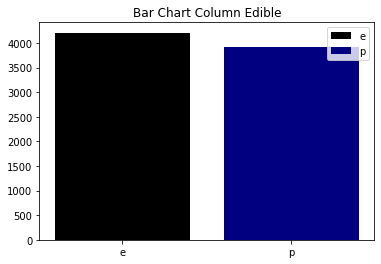

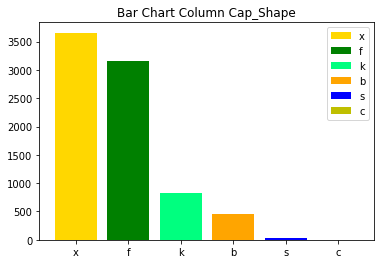

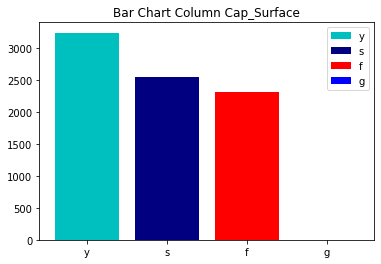

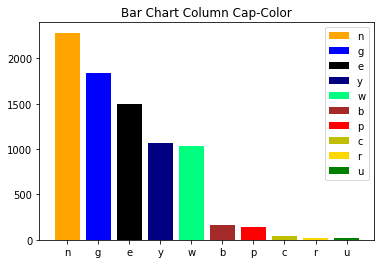

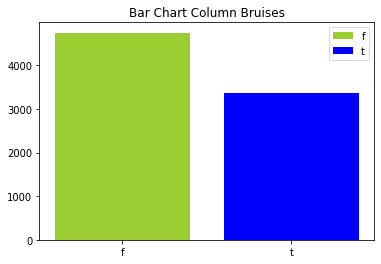

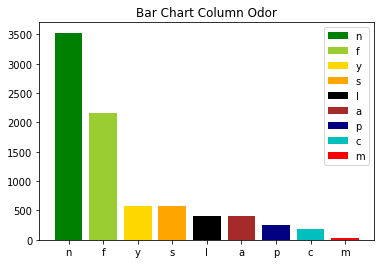

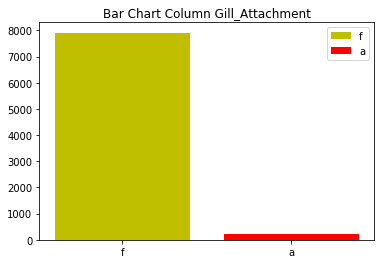

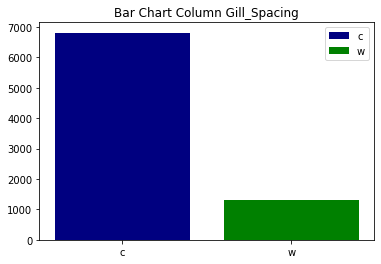

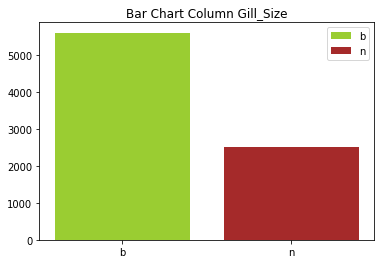

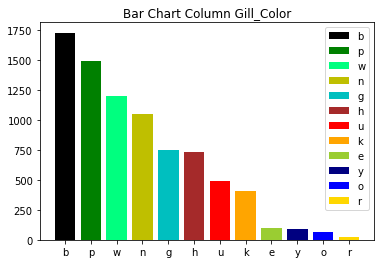

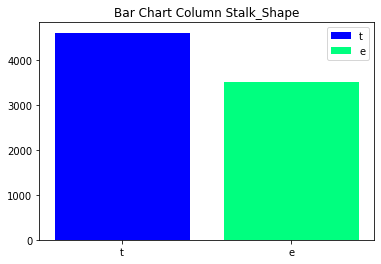

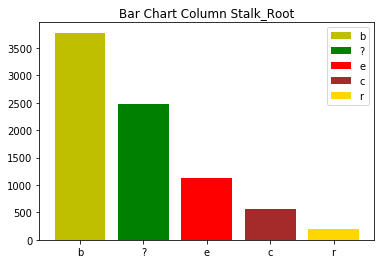

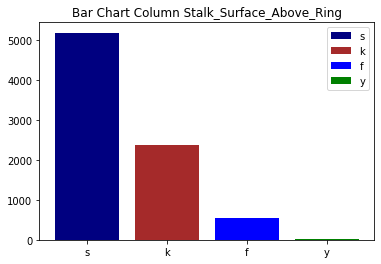

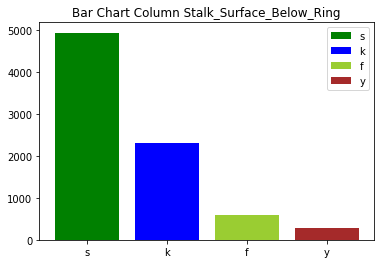

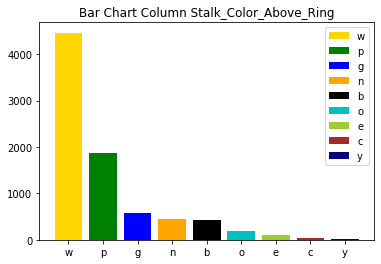

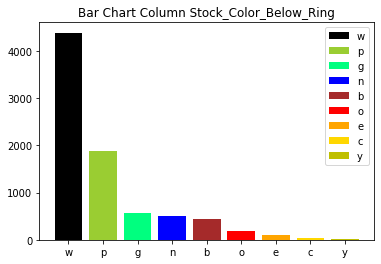

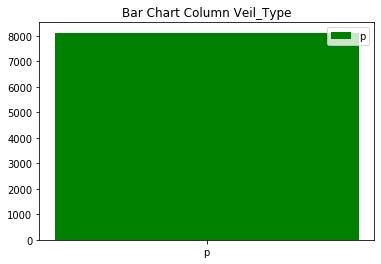

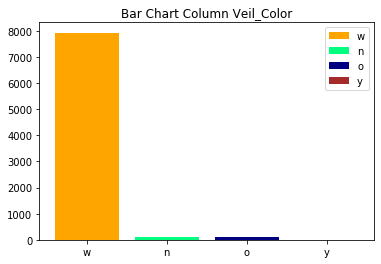

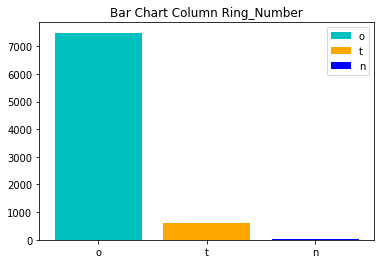

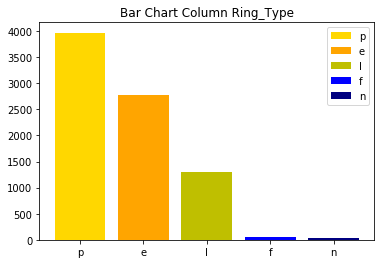

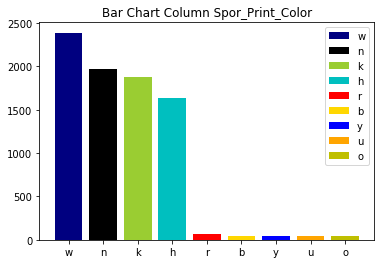

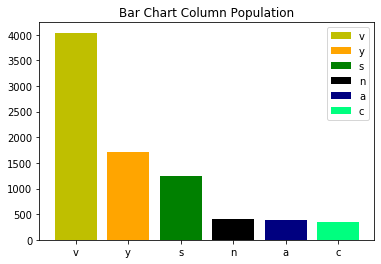

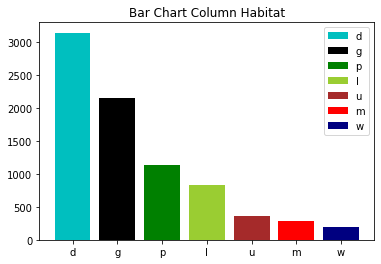

In [10]:
color_array = [ 'r', 'b', 'k', 'g', 'orange', 'c', 'y', 'navy', 'springgreen', 'gold', 'brown', 'yellowgreen']
for column in column_names:
    frequencies =  mush_data_raw[column].value_counts()
    seleceted_colors = np.random.choice(color_array, size = len(frequencies), replace=False)
    plt.figure()
    handles = plt.bar(x=frequencies.index, height=frequencies.values, color=seleceted_colors)
    plt.title(f"Bar Chart Column {column}")
    plt.legend(handles, frequencies.index)

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

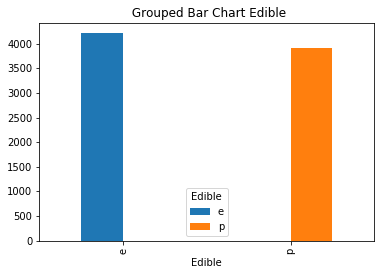

<Figure size 432x288 with 0 Axes>

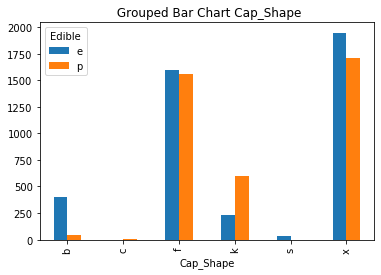

<Figure size 432x288 with 0 Axes>

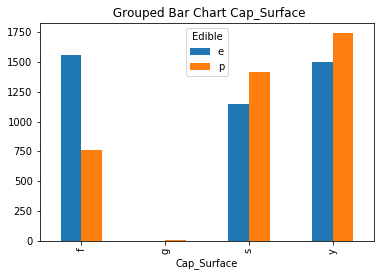

<Figure size 432x288 with 0 Axes>

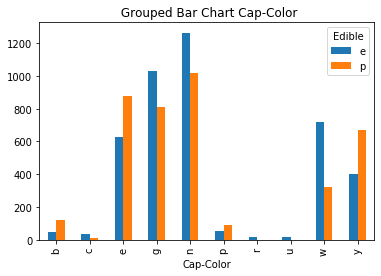

<Figure size 432x288 with 0 Axes>

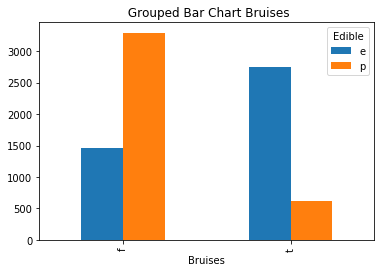

<Figure size 432x288 with 0 Axes>

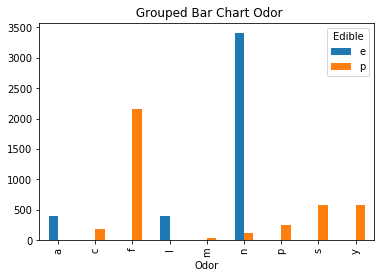

<Figure size 432x288 with 0 Axes>

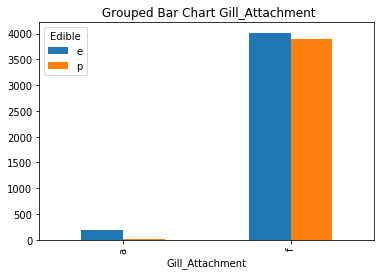

<Figure size 432x288 with 0 Axes>

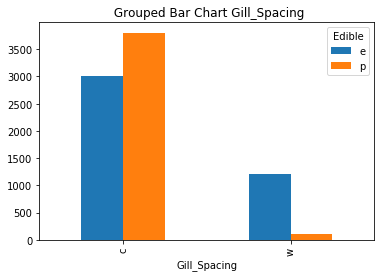

<Figure size 432x288 with 0 Axes>

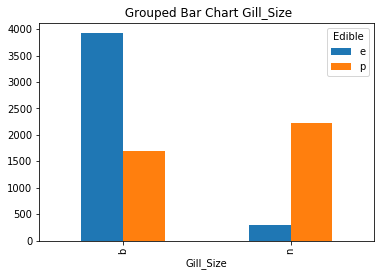

<Figure size 432x288 with 0 Axes>

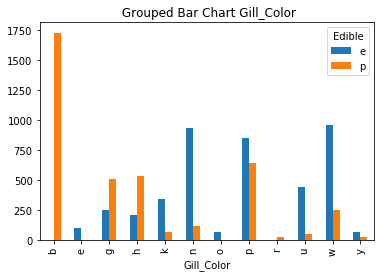

<Figure size 432x288 with 0 Axes>

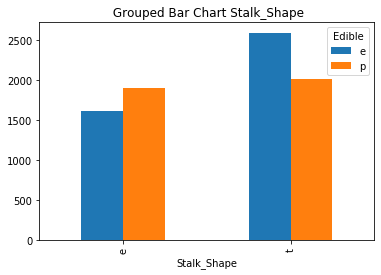

<Figure size 432x288 with 0 Axes>

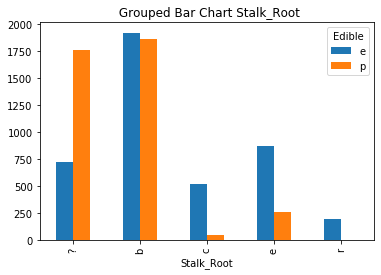

<Figure size 432x288 with 0 Axes>

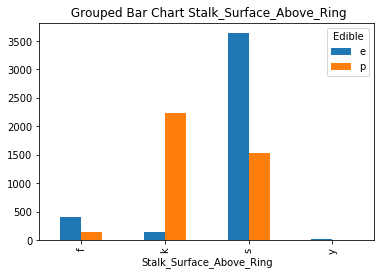

<Figure size 432x288 with 0 Axes>

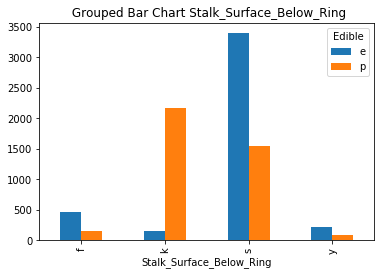

<Figure size 432x288 with 0 Axes>

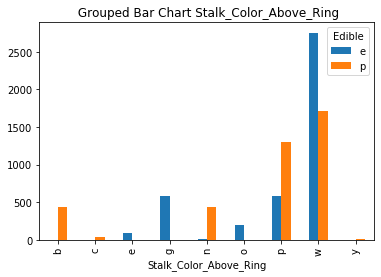

<Figure size 432x288 with 0 Axes>

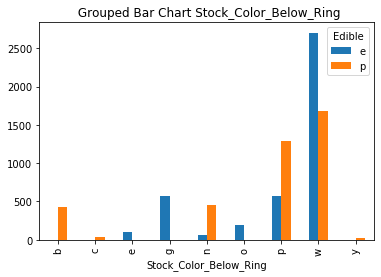

<Figure size 432x288 with 0 Axes>

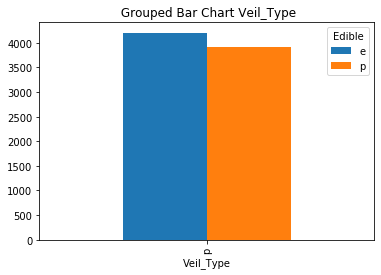

<Figure size 432x288 with 0 Axes>

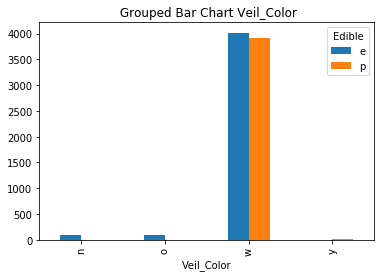

<Figure size 432x288 with 0 Axes>

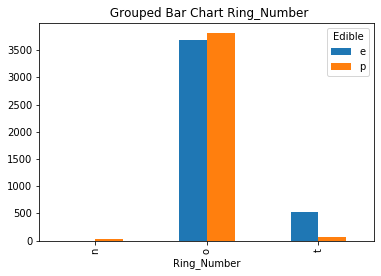

<Figure size 432x288 with 0 Axes>

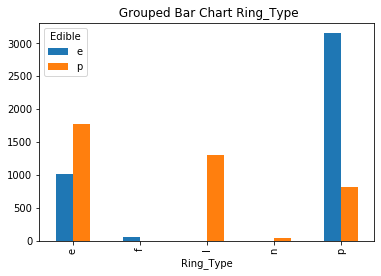

<Figure size 432x288 with 0 Axes>

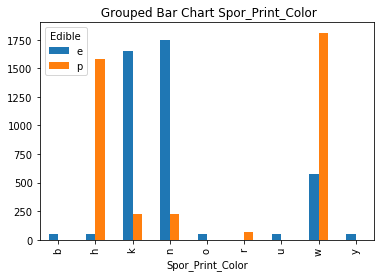

<Figure size 432x288 with 0 Axes>

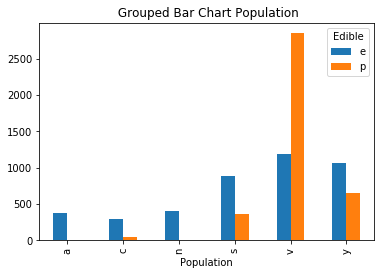

<Figure size 432x288 with 0 Axes>

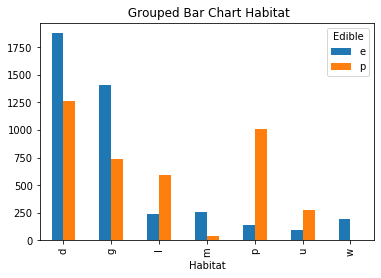

In [11]:
for column in column_names:
    
    tabbed_data = pd.crosstab(columns=mush_data_raw[column],index=mush_data_raw['Edible'])
    tabbed_data = tabbed_data.T
    plt.figure()
    tabbed_data.plot(kind='bar')
    plt.title(f" Grouped Bar Chart {column}")

In [12]:
mush_data_raw = mush_data_raw.drop('Stalk_Root', axis=1)

In [13]:
mush_data_raw = mush_data_raw.drop('Veil_Type', axis=1)

In [14]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number                 8124 non-null object
Ring_Type                   8124 non-null object
Spor_Print_

In [15]:
duplicate = mush_data_raw[mush_data_raw.duplicated()]
duplicate

Empty DataFrame
Columns: [Edible, Cap_Shape, Cap_Surface, Cap-Color, Bruises, Odor, Gill_Attachment, Gill_Spacing, Gill_Size, Gill_Color, Stalk_Shape, Stalk_Surface_Above_Ring, Stalk_Surface_Below_Ring, Stalk_Color_Above_Ring, Stock_Color_Below_Ring, Veil_Color, Ring_Number, Ring_Type, Spor_Print_Color, Population, Habitat]
Index: []

[0 rows x 21 columns]

In [16]:
y = mush_data_raw['Edible']
y.shape

(8124,)

In [17]:
X = mush_data_raw.drop(['Edible'], axis =1)
X.head()

Cap_Shape Cap_Surface Cap-Color Bruises Odor Gill_Attachment Gill_Spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  Gill_Size Gill_Color Stalk_Shape Stalk_Surface_Above_Ring  \
0         n          k           e                        s   
1         b          k           e                        s   
2         b          n           e                        s   
3         n          n           e                        s   
4         b          k           t                        s   

  Stalk_Surface_Below_Ring Stalk_Color_Above_Ring Stock_Color_Below_Ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  Veil_Color Ring_Number Ring_Type Spor_Print_Color Population Habitat  
0          w           o         p                k          s       u  
1          w           o         p                n          n       g  
2          w           o         p                n          n       m  
3          w           o         p                k          s       u  
4          w           o         e                n          a       g

In [16]:
#ordinal encoder

In [18]:
X_with_dummies = pd.get_dummies(X)
X_with_dummies.head()

Cap_Shape_b  Cap_Shape_c  Cap_Shape_f  Cap_Shape_k  Cap_Shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Cap_Shape_x  Cap_Surface_f  Cap_Surface_g  Cap_Surface_s  Cap_Surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  Population_s  Population_v  Population_y  Habitat_d  Habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   Habitat_l  Habitat_m  Habitat_p  Habitat_u  Habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 111 columns]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

(6499, 111)
(6499,)


In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_val)

In [21]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       673
           p       1.00      1.00      1.00       627

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [22]:
y_final_test = knn.predict(X_test)
print(classification_report(y_test, y_final_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



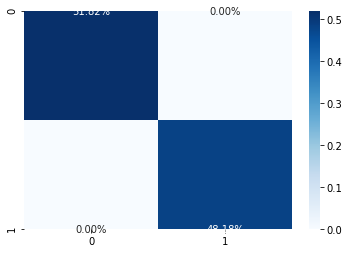

In [23]:
cf_matrix = confusion_matrix(y_test, y_final_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [24]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X_train))
pca_df.head()

0         1
0 -1.442237 -0.112596
1 -1.551608  0.046919
2  1.847217 -1.222577
3  0.246121  0.078089
4 -0.734801  0.173667

In [25]:
explained_variance_2 = pca.explained_variance_ratio_
explained_variance_2

array([0.17005583, 0.13117555])

In [26]:
explained_variance_2 = np.insert(explained_variance_2,0,0)
explained_variance_2

array([0.        , 0.17005583, 0.13117555])

In [27]:
cumulative_variance_2 = np.cumsum(np.round(explained_variance_2, decimals=3))

In [28]:
pca_2_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2'], columns =['PC'])
explained_variance_df_2 = pd.DataFrame(explained_variance_2, columns=['Explained Variance'])
cumulative_variance_df_2 = pd.DataFrame(cumulative_variance_2, columns=['Cumulative Variance'])

In [29]:
df_pca_2_explained_variance = pd.concat([pca_2_df_variance, explained_variance_df_2, cumulative_variance_df_2], axis=1)
df_pca_2_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.170056                0.170
2  PCA2            0.131176                0.301

In [30]:
fig = py.bar(df_pca_2_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_2_explained_variance['PC'], 
    y = df_pca_2_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_2_explained_variance['PC'],
        y = df_pca_2_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [32]:
kmeans = KMeans(n_clusters =23)
kmeans.fit(pca_df)
kmeans.labels_

array([14, 10, 20, ...,  5,  4, 10], dtype=int32)

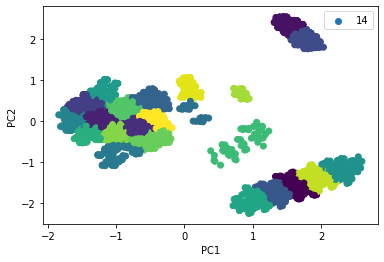

In [33]:
plt.scatter(pca_df[0], pca_df[1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(kmeans.labels_)

In [48]:
pca_3 = PCA(n_components=3)
pca_3_df = pd.DataFrame(pca_3.fit_transform(X_train), columns=['PCA1', 'PCA2', 'PCA3'])
pca_3_df.head()

PCA1      PCA2      PCA3
0 -1.442237 -0.112596 -1.374082
1 -1.551608  0.046919 -1.599220
2  1.847216 -1.222577  0.223431
3  0.246121  0.078089  0.194365
4 -0.734801  0.173668  0.263403

In [49]:
explained_variance = pca_3.explained_variance_ratio_
explained_variance

array([0.17005583, 0.13117555, 0.09369733])

In [36]:
explained_variance = np.insert(explained_variance, 0,0)

In [37]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [38]:
pca_3_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2', 'PCA3'], columns =['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [39]:
df_pca_3_explained_variance = pd.concat([pca_3_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_3_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.170056                0.170
2  PCA2            0.131176                0.301
3  PCA3            0.093697                0.395

In [40]:
fig = py.bar(df_pca_3_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_3_explained_variance['PC'], 
    y = df_pca_3_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_3_explained_variance['PC'],
        y = df_pca_3_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [42]:
kmeans = KMeans(n_clusters =23)
kmeans.fit(pca_3_df)
kmeans.labels_

array([ 3,  3,  2, ...,  0, 11, 22], dtype=int32)

In [43]:
fig = py.scatter_3d(pca_3_df, x='PCA1', y='PCA2', z='PCA3',
              color=kmeans.labels_)

fig.show()

In [54]:
pca_full = PCA() 
pca_df = pd.DataFrame(pca_full.fit_transform(X_train))
pca_df.head()

0         1         2         3         4         5         6    \
0 -1.442237 -0.112595 -1.374090  0.225412 -0.605604  0.198063  0.742478   
1 -1.551608  0.046920 -1.599225  0.351310 -0.481462  0.379938  0.797871   
2  1.847217 -1.222577  0.223424 -0.075871 -1.029378 -0.238471 -0.258977   
3  0.246121  0.078089  0.194365 -0.522204 -0.793829  0.123728  0.196444   
4 -0.734801  0.173668  0.263400 -0.578049  1.610521  1.974874 -1.252156   

        7         8         9    ...           101           102  \
0 -0.349965  0.217976 -0.746950  ...  5.065059e-16 -1.403340e-16   
1 -0.473896  0.130626  0.622483  ...  7.300519e-17 -9.730731e-17   
2  0.174611  0.784342 -0.094295  ... -4.422155e-16  6.136009e-16   
3  0.661873 -0.795437 -0.053366  ... -4.992800e-17  1.911048e-16   
4 -1.165191 -1.002663 -0.524806  ... -1.281190e-15 -8.834283e-17   

            103           104           105           106           107  \
0  2.101730e-16  7.627982e-17  2.002048e-16  3.625421e-16 -1.562072e-16   
1  1.962963e-16 -2.428368e-16  3.912215e-16  4.446367e-16 -8.673982e-17   
2 -6.935198e-16  3.747468e-16 -8.728592e-16 -5.472753e-16  6.718636e-18   
3 -3.789631e-17  1.256948e-16 -1.420738e-16 -9.975770e-17 -4.889604e-17   
4  7.232829e-16 -2.050264e-16  6.897433e-16  9.075708e-17  2.264574e-16   

            108           109           110  
0  8.059451e-16 -9.468733e-17  1.282366e-16  
1  4.085460e-16 -3.933438e-16 -1.420017e-16  
2 -8.600821e-16  9.332232e-16 -1.867404e-16  
3 -3.265023e-16 -2.253366e-17 -3.000491e-17  
4  1.489472e-15 -7.081143e-16 -9.205459e-17  

[5 rows x 111 columns]

In [55]:
explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([1.70055830e-01, 1.31175548e-01, 9.36973344e-02, 6.27415893e-02,
       3.99892439e-02, 3.82350820e-02, 3.24367762e-02, 2.82492208e-02,
       2.71992297e-02, 2.20102024e-02, 2.05604063e-02, 1.92668087e-02,
       1.87691389e-02, 1.79387995e-02, 1.62006112e-02, 1.56721072e-02,
       1.49917345e-02, 1.44560603e-02, 1.34857998e-02, 1.20622528e-02,
       1.11381483e-02, 1.05282918e-02, 1.03547273e-02, 9.86916243e-03,
       8.92736324e-03, 8.40962069e-03, 8.19840921e-03, 7.71314110e-03,
       7.58877667e-03, 7.25216488e-03, 6.77156322e-03, 6.58697449e-03,
       5.82015888e-03, 5.58768595e-03, 5.43925134e-03, 5.07630353e-03,
       4.82108911e-03, 4.52576553e-03, 4.48045665e-03, 4.36960622e-03,
       4.13494538e-03, 3.73980074e-03, 3.55316436e-03, 3.37637736e-03,
       3.26875745e-03, 2.87342502e-03, 2.35882450e-03, 2.21220521e-03,
       2.15804545e-03, 2.06283540e-03, 1.89795716e-03, 1.55271587e-03,
       1.43008327e-03, 1.27024583e-03, 1.14587961e-03, 1.08478969e-03,
      

In [56]:
explained_variance = np.insert(explained_variance, 0,0)

In [57]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [58]:
pca_full_df_variance = pd.DataFrame()
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [61]:
df_pca_full_explained_variance = pd.concat([pca_full_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_full_explained_variance

Explained Variance  Cumulative Variance
0          0.000000e+00                0.000
1          1.700558e-01                0.170
2          1.311755e-01                0.301
3          9.369733e-02                0.395
4          6.274159e-02                0.458
..                  ...                  ...
107        7.336374e-34                0.997
108        7.336374e-34                0.997
109        3.559126e-34                0.997
110        2.310690e-34                0.997
111        2.018255e-35                0.997

[112 rows x 2 columns]

In [63]:
fig = py.bar(df_pca_full_explained_variance, x = df_pca_full_explained_variance.index , y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_full_explained_variance.index, 
    y = df_pca_full_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_full_explained_variance.index,
        y = df_pca_full_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [67]:
loadings = pca_full.components_.T
df_loadings = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(pca_df.shape[1])], index=X_train.columns)
df_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Cap_Shape_b -0.032477  0.016672  0.049153 -0.087179  0.059525  0.024437   
Cap_Shape_c  0.000080 -0.000138  0.000496 -0.000432  0.000974  0.001289   
Cap_Shape_f  0.007922  0.030419 -0.071819  0.170600  0.486281 -0.419663   
Cap_Shape_k  0.061213 -0.082300  0.013157 -0.039760  0.076438  0.086833   
Cap_Shape_s -0.001344 -0.000353  0.001581 -0.002382 -0.000229  0.003901   
...               ...       ...       ...       ...       ...       ...   
Habitat_l    0.064461 -0.088265  0.002564 -0.043097  0.110104  0.128679   
Habitat_m   -0.026261  0.009476  0.014661 -0.075303 -0.003960 -0.021082   
Habitat_p    0.106319  0.008640 -0.021128 -0.054717  0.011933 -0.043705   
Habitat_u   -0.019548 -0.001753  0.014100 -0.052957 -0.021993 -0.063885   
Habitat_w   -0.008248 -0.003300  0.007912 -0.026699  0.068662  0.056790   

                  PC7       PC8       PC9      PC10  ...         PC102  \
Cap_Shape_b  0.005166  0.014437  0.036492 -0.000718  ... -0.000000e+00   
Cap_Shape_c  0.001212  0.000944 -0.000819 -0.000116  ... -5.437310e-16   
Cap_Shape_f -0.093411  0.147811 -0.098230  0.000889  ... -1.484755e-16   
Cap_Shape_k  0.044262  0.034713  0.075870 -0.006010  ... -3.264447e-16   
Cap_Shape_s -0.008269  0.015758 -0.011694  0.003380  ... -8.766320e-16   
...               ...       ...       ...       ...  ...           ...   
Habitat_l   -0.098827 -0.115192 -0.074748  0.001148  ... -1.106535e-01   
Habitat_m    0.009846 -0.012278  0.014173 -0.001007  ... -1.106535e-01   
Habitat_p    0.054863 -0.047436 -0.010944  0.023620  ... -1.106535e-01   
Habitat_u   -0.092188  0.014704 -0.013506  0.012895  ... -1.106535e-01   
Habitat_w    0.070173 -0.006788  0.086033 -0.005528  ... -1.106535e-01   

                    PC103         PC104         PC105         PC106  \
Cap_Shape_b  0.000000e+00 -0.000000e+00  0.000000e+00  0.000000e+00   
Cap_Shape_c -9.964318e-16 -1.509855e-15  2.720341e-16 -1.767295e-16   
Cap_Shape_f -6.870640e-18 -1.091300e-16 -1.570017e-16  7.863136e-17   
Cap_Shape_k  2.017363e-16  4.879228e-17 -1.111186e-16  6.238083e-17   
Cap_Shape_s  4.378207e-16  3.062112e-16 -6.668631e-16  1.402150e-16   
...                   ...           ...           ...           ...   
Habitat_l   -1.955477e-02 -1.750433e-02  2.176948e-02 -2.252889e-02   
Habitat_m   -1.955477e-02 -1.750433e-02  2.176948e-02 -2.252889e-02   
Habitat_p   -1.955477e-02 -1.750433e-02  2.176948e-02 -2.252889e-02   
Habitat_u   -1.955477e-02 -1.750433e-02  2.176948e-02 -2.252889e-02   
Habitat_w   -1.955477e-02 -1.750433e-02  2.176948e-02 -2.252889e-02   

                    PC107         PC108         PC109         PC110  \
Cap_Shape_b -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   
Cap_Shape_c  1.439927e-16  1.160021e-16  9.482212e-16 -1.049667e-15   
Cap_Shape_f -1.098891e-17  1.628105e-16 -2.830724e-17 -7.991669e-17   
Cap_Shape_k  3.454291e-17  1.432201e-16 -2.775395e-16 -7.649741e-18   
Cap_Shape_s  4.863291e-17  7.913719e-16 -1.826062e-17 -1.214249e-16   
...                   ...           ...           ...           ...   
Habitat_l   -3.087466e-03 -5.247224e-04  2.820739e-02 -3.675680e-02   
Habitat_m   -3.087466e-03 -5.247224e-04  2.820739e-02 -3.675680e-02   
Habitat_p   -3.087466e-03 -5.247224e-04  2.820739e-02 -3.675680e-02   
Habitat_u   -3.087466e-03 -5.247224e-04  2.820739e-02 -3.675680e-02   
Habitat_w   -3.087466e-03 -5.247224e-04  2.820739e-02 -3.675680e-02   

                    PC111  
Cap_Shape_b  0.000000e+00  
Cap_Shape_c  5.533768e-16  
Cap_Shape_f -4.354114e-17  
Cap_Shape_k  1.179409e-16  
Cap_Shape_s  1.639823e-16  
...                   ...  
Habitat_l    6.956539e-02  
Habitat_m    6.956539e-02  
Habitat_p    6.956539e-02  
Habitat_u    6.956539e-02  
Habitat_w    6.956539e-02  

[111 rows x 111 columns]